In [3]:
#Python code for Neural Network MLP for Regression

#Predicting a countries overall US News Ranking Score based on rankings from other attributes

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)
#np.random.seed(8)

In [5]:
ratings = pd.read_csv('/Users/clairemahon/DS4420/FinalProject/countrybranding.csv')
ratings.head()

,Year,Brand,Africa,Asia,northeu,southeu,middle east,northam,middleam,southam,...,Trendy_R,Trustworthy_R,Unapproachable_R,Unique_R,Well developed infrastructure_R,Well developed legal framework_R,Well developed public education system_R,Well developed public health system_R,Well distributed political power_R,GDP_PPP
0,2016,Algeria,1,0,0,0,0,0,0,0,...,53,55,7,59,47,36,41,55,41,11685.451418
1,2016,Argentina,0,0,0,0,0,0,0,1,...,25,54,40,42,30,53,29,34,51,20307.870052
2,2016,Australia,0,0,0,0,0,0,0,0,...,10,6,60,22,9,10,8,7,10,47249.434815
3,2016,Austria,0,0,1,0,0,0,0,0,...,22,7,52,56,11,9,9,9,9,52684.017113
4,2016,Azerbaijan,0,0,0,0,1,0,0,0,...,45,27,4,34,53,45,50,45,47,14371.022741


In [ ]:
#2023 is the year we'll use for our model
ratings_2023 = ratings[ratings['Year'] == 2023]

#Verify by looking at the first few rows of the filtered dataset
ratings_2023.head()


,Year,Brand,Africa,Asia,northeu,southeu,middle east,northam,middleam,southam,...,Trendy_R,Trustworthy_R,Unapproachable_R,Unique_R,Well developed infrastructure_R,Well developed legal framework_R,Well developed public education system_R,Well developed public health system_R,Well distributed political power_R,GDP_PPP
536,2023,Algeria,1,0,0,0,0,0,0,0,...,67,60,14,72,69,57,79,67,45,NaN
537,2023,Azerbaijan,0,0,0,0,1,0,0,0,...,62,68,8,48,63,75,55,78,62,NaN
538,2023,Argentina,0,0,0,0,0,0,0,1,...,28,62,63,47,46,46,56,43,71,NaN
539,2023,Australia,0,0,0,0,0,0,0,0,...,13,10,85,28,15,9,11,8,11,NaN
540,2023,Austria,0,0,1,0,0,0,0,0,...,38,11,77,77,18,13,13,12,12,NaN


In [7]:
ratings_2023.columns.unique()

Index(['Year', 'Brand', 'Africa', 'Asia', 'northeu', 'southeu', 'middle east',
       'northam', 'middleam', 'southam',
       ...
       'Trendy_R', 'Trustworthy_R', 'Unapproachable_R', 'Unique_R',
       'Well developed infrastructure_R', 'Well developed legal framework_R',
       'Well developed public education system_R',
       'Well developed public health system_R',
       'Well distributed political power_R', 'GDP_PPP'],
      dtype='object', length=162)

In [8]:
#For our analysis, we will be predicting the OVERALL_R for each country based on the scores for the other attrubutes

#Remove the regions
regions_to_remove = ['Africa', 'Asia', 'northeu', 'southeu', 'middle east', 'northam', 'middleam', 'southam', 'oceania']
ratings_clean = ratings_2023.drop(columns=regions_to_remove)

# Verify the cleaned dataset
ratings_clean.head()


,Year,Brand,ENTREPRENEURSHIP_100p,QUALITY OF LIFE_100p,SOCIAL PURPOSE_100p,CULTURAL INFLUENCE_100p,OPEN FOR BUSINESS_100p,ADVENTURE_100p,POWER_100p,HERITAGE_100p,...,Trendy_R,Trustworthy_R,Unapproachable_R,Unique_R,Well developed infrastructure_R,Well developed legal framework_R,Well developed public education system_R,Well developed public health system_R,Well distributed political power_R,GDP_PPP
536,2023,Algeria,2.376533,4.143210,3.499413,2.829967,47.715331,6.755171,6.187535,8.059377,...,67,60,14,72,69,57,79,67,45,NaN
537,2023,Azerbaijan,2.274233,3.420045,1.769237,2.450865,46.148677,8.073444,5.620849,4.689872,...,62,68,8,48,63,75,55,78,62,NaN
538,2023,Argentina,12.648489,17.530367,15.197747,32.979023,41.755562,68.429215,7.994341,59.801796,...,28,62,63,47,46,46,56,43,71,NaN
539,2023,Australia,69.579013,86.842890,83.119251,60.076162,75.805836,76.594754,32.201261,54.277252,...,13,10,85,28,15,9,11,8,11,NaN
540,2023,Austria,61.893116,78.915064,75.568816,39.996646,68.831649,56.590779,11.607042,56.401922,...,38,11,77,77,18,13,13,12,12,NaN


In [ ]:
#Now want to drop all the attribute columns with _100p and keep all with _R, 'brand'
columns_to_keep = ['Brand'] + [col for col in ratings_clean.columns if col.endswith('_R')]

ratings_clean = ratings_clean[columns_to_keep]

# Verify the cleaned dataset
ratings_clean.head()

,Brand,ENTREPRENEURSHIP_R,QUALITY OF LIFE_R,SOCIAL PURPOSE_R,CULTURAL INFLUENCE_R,OPEN FOR BUSINESS_R,ADVENTURE_R,POWER_R,HERITAGE_R,MOVERS_R,...,Transparent government practices_R,Trendy_R,Trustworthy_R,Unapproachable_R,Unique_R,Well developed infrastructure_R,Well developed legal framework_R,Well developed public education system_R,Well developed public health system_R,Well distributed political power_R
536,Algeria,71,79,69,74,66,78,52,70,65,...,36,67,60,14,72,69,57,79,67,45
537,Azerbaijan,72,82,81,78,69,72,57,80,40,...,53,62,68,8,48,63,75,55,78,62
538,Argentina,41,44,32,34,75,12,47,16,53,...,81,28,62,63,47,46,46,56,43,71
539,Australia,15,8,9,12,13,8,17,19,26,...,9,13,10,85,28,15,9,11,8,11
540,Austria,19,12,11,28,18,17,38,18,73,...,13,38,11,77,77,18,13,13,12,12


In [10]:
#Count NaN Values across the dataset for each column
# Count NaN values in each column
nan_counts = ratings_clean.isna().sum().sort_values()

# Print the result
print(nan_counts)

Brand                                  0
Provides easy access to capital_R      0
Progressive_R                          0
Prestigious_R                          0
Politically stable_R                   0
                                      ..
Educated population_R                  0
Well distributed political power_R     0
Open travel policies_R                87
Easy to get around_R                  87
Individualistic_R                     87
Length: 76, dtype: int64


In [11]:
#Drop these 3 columns with NaN values

In [12]:
# Drop the specified columns with NaN values
columns_to_drop = ['Open travel policies_R', 'Easy to get around_R', 'Individualistic_R']
ratings_clean = ratings_clean.drop(columns=columns_to_drop, errors='ignore')

# Verify the updated dataset
ratings_clean.head()

,Brand,ENTREPRENEURSHIP_R,QUALITY OF LIFE_R,SOCIAL PURPOSE_R,CULTURAL INFLUENCE_R,OPEN FOR BUSINESS_R,ADVENTURE_R,POWER_R,HERITAGE_R,MOVERS_R,...,Transparent government practices_R,Trendy_R,Trustworthy_R,Unapproachable_R,Unique_R,Well developed infrastructure_R,Well developed legal framework_R,Well developed public education system_R,Well developed public health system_R,Well distributed political power_R
536,Algeria,71,79,69,74,66,78,52,70,65,...,36,67,60,14,72,69,57,79,67,45
537,Azerbaijan,72,82,81,78,69,72,57,80,40,...,53,62,68,8,48,63,75,55,78,62
538,Argentina,41,44,32,34,75,12,47,16,53,...,81,28,62,63,47,46,46,56,43,71
539,Australia,15,8,9,12,13,8,17,19,26,...,9,13,10,85,28,15,9,11,8,11
540,Austria,19,12,11,28,18,17,38,18,73,...,13,38,11,77,77,18,13,13,12,12


There are 71 features apart from the brand name and overall score

In [13]:
#How many total countries are in this dataset?

# Count the total number of rows in the dataset
total_countries = ratings_clean.shape[0]

# Print the result
print(f"Total number of countries: {total_countries}")

Total number of countries: 87


Now, let's get into the prediction model - Neural Network MLP

In [14]:
from sklearn.neural_network import MLPRegressor

https://scikit-learn.org/1.5/modules/generated/sklearn.neural_network.MLPRegressor.html

In [ ]:
#Samples - each row represents a country ('Brand'))
#Input features (X) 76 numeric features
#Target variable (y) the OVERALL_R

In [16]:
countries = ratings_clean.drop(columns=['Brand']) #Drop Brand (country) column

In [17]:
X = countries.drop(columns=['OVERALL_R']) #Features
y = countries['OVERALL_R'] #Target

In [18]:
# turn X into a numpy array for ML purposes
X = X.to_numpy()
X

array([[71, 79, 69, ..., 79, 67, 45],
       [72, 82, 81, ..., 55, 78, 62],
       [41, 44, 32, ..., 56, 43, 71],
       ...,
       [ 1, 23, 19, ..., 16, 23, 14],
       [67, 60, 38, ..., 57, 75, 30],
       [81, 83, 79, ..., 64, 64, 52]])

In [19]:
# turn Y into a numpy array for ML purposes
y = y.to_numpy()
y

array([79, 77, 39,  4, 22, 58, 69, 18, 28, 61, 80, 86, 64, 78,  2, 54, 51,
       20, 60, 42, 45, 47, 48, 13, 53, 71, 74, 56, 14, 12,  7, 73, 27, 75,
       81, 49, 30, 41, 87, 23, 36, 15,  6, 84, 67, 59, 21, 85, 72, 62, 24,
       38, 33, 40, 65, 10,  8, 11, 52, 50, 43, 35, 25, 26, 55, 37, 31, 82,
       16, 63, 44, 66, 46, 76, 17,  3,  1, 29, 19, 70, 32, 68, 34,  9,  5,
       57, 83])

In [20]:
# min-max scaling
from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()


# Scale x and y
X_scale = x_scaler.fit_transform(X).round(2)

y_scaled = y_scaler.fit_transform(y.reshape(-1, 1))

In [21]:
X_scale

array([[0.81, 0.91, 0.79, ..., 0.91, 0.77, 0.51],
       [0.83, 0.94, 0.93, ..., 0.63, 0.9 , 0.71],
       [0.47, 0.5 , 0.36, ..., 0.64, 0.49, 0.81],
       ...,
       [0.  , 0.26, 0.21, ..., 0.17, 0.26, 0.15],
       [0.77, 0.69, 0.43, ..., 0.65, 0.86, 0.34],
       [0.93, 0.95, 0.91, ..., 0.73, 0.73, 0.59]])

In [22]:
y_scaled

array([[0.90697674],
       [0.88372093],
       [0.44186047],
       [0.03488372],
       [0.24418605],
       [0.6627907 ],
       [0.79069767],
       [0.19767442],
       [0.31395349],
       [0.69767442],
       [0.91860465],
       [0.98837209],
       [0.73255814],
       [0.89534884],
       [0.01162791],
       [0.61627907],
       [0.58139535],
       [0.22093023],
       [0.68604651],
       [0.47674419],
       [0.51162791],
       [0.53488372],
       [0.54651163],
       [0.13953488],
       [0.60465116],
       [0.81395349],
       [0.84883721],
       [0.63953488],
       [0.15116279],
       [0.12790698],
       [0.06976744],
       [0.8372093 ],
       [0.30232558],
       [0.86046512],
       [0.93023256],
       [0.55813953],
       [0.3372093 ],
       [0.46511628],
       [1.        ],
       [0.25581395],
       [0.40697674],
       [0.1627907 ],
       [0.05813953],
       [0.96511628],
       [0.76744186],
       [0.6744186 ],
       [0.23255814],
       [0.976

In [23]:
# Add a bias column (intercept) of 1's to the feature matrix
X_scale = np.c_[np.ones(X_scale.shape[0]), X_scale]  # Adds a column of 1's at the start

X_scale

array([[1.  , 0.81, 0.91, ..., 0.91, 0.77, 0.51],
       [1.  , 0.83, 0.94, ..., 0.63, 0.9 , 0.71],
       [1.  , 0.47, 0.5 , ..., 0.64, 0.49, 0.81],
       ...,
       [1.  , 0.  , 0.26, ..., 0.17, 0.26, 0.15],
       [1.  , 0.77, 0.69, ..., 0.65, 0.86, 0.34],
       [1.  , 0.93, 0.95, ..., 0.73, 0.73, 0.59]])

In [24]:
# Separating data into training and test sets for cross validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scaled, test_size=0.2, random_state=42)

In [25]:
#Starting with 2 hidden layers (first 64 neurons, second 128) given there are 72 features

regr = MLPRegressor(hidden_layer_sizes=(128, 64), 
                    activation='relu', 
                    learning_rate_init=0.01, 
                    max_iter=400, 
                    random_state=12).fit(X_train, y_train)
print(regr.predict(X_train))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.08350522 0.88198005 0.88684208 0.07916075 0.49167031 0.17495856
 0.69018182 0.37052469 0.62063598 0.21543962 0.88652839 0.58536618
 0.75842865 0.68565883 0.60212466 0.07539116 0.90193191 0.19245916
 0.75321816 0.41307168 0.49492418 0.49098317 0.81802639 0.89797225
 0.90410102 0.60294548 0.03069748 0.24501463 0.91321922 0.29533077
 0.74177628 0.8270199  0.10352365 0.35826231 0.20724617 0.96453328
 0.68313068 0.91713879 0.26386113 0.23461315 0.73843577 0.65655947
 0.52749474 0.66991943 0.13796933 0.2502827  0.56375657 0.77943402
 0.2619358  0.11174936 0.25552631 0.37351735 0.58681027 0.32400798
 0.03980176 0.43178072 0.11682258 0.82787972 0.35507445 0.48710302
 0.42948098 0.10963429 0.83683938 0.16407774 0.46056321 0.47872771
 0.77584428 0.01227237 0.38627852]


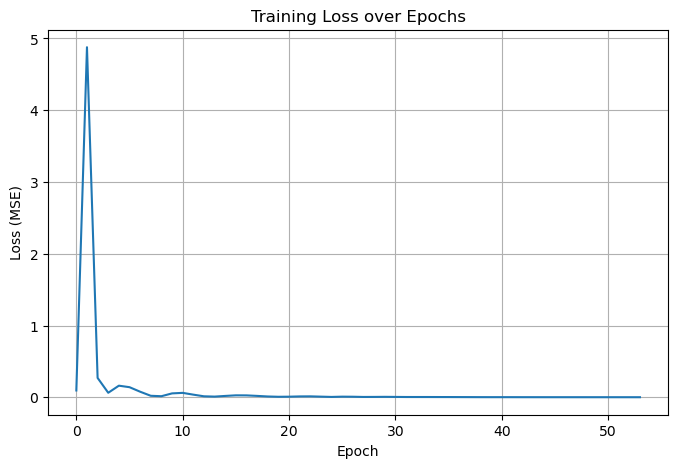

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(regr.loss_curve_)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.grid(True)
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred_train = regr.predict(X_train).reshape(-1, 1)

print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Train R^2:", r2_score(y_train, y_pred_train))

Train MSE: 0.0015732656145787754
Train R^2: 0.9806321009876144


Pretty good results with a low MSE and a high R^2. We want to see how it works on the test data though ...

In [28]:
y_pred_test = regr.predict(X_test).reshape(-1, 1)

print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Test R^2:", r2_score(y_test, y_pred_test))

Test MSE: 0.001667824595601045
Test R^2: 0.9831620101798676


Even better! We've done a good job at predicting GDP_PPP given the input features.

In [29]:
#Lets inverse transform the scaling and see the effects on our GDP_PPP prediction
y_train_real = y_scaler.inverse_transform(y_train)
y_test_real = y_scaler.inverse_transform(y_test)

y_pred_train_real = y_scaler.inverse_transform(y_pred_train)
y_pred_test_real = y_scaler.inverse_transform(y_pred_test)


Now let's get some actual GDP_PPP results

In [30]:
print("Train MAE (real scale):", mean_absolute_error(y_train_real, y_pred_train_real))
print("Train R^2 (real scale):", r2_score(y_train_real, y_pred_train_real))

print("Test MAE (real scale):", mean_absolute_error(y_test_real, y_pred_test_real))
print("Test R^2 (real scale):", r2_score(y_test_real, y_pred_test_real))

Train MAE (real scale): 2.6948249570071354
Train R^2 (real scale): 0.9806321009876144
Test MAE (real scale): 2.9979118877954107
Test R^2 (real scale): 0.9831620101798676


In [31]:
len(y_test_real)

18

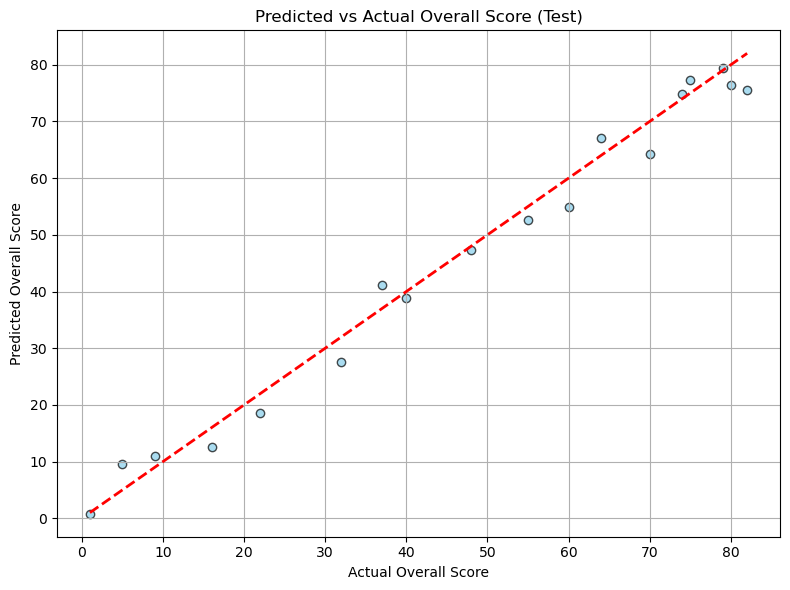

In [39]:
#Let's plot the output of predicted Overall Score versus actual Overall Score for the countries (Test)
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test_real, y_pred_test_real, color='skyblue', edgecolor='k', alpha=0.7)
plt.plot([y_test_real.min(), y_test_real.max()],
         [y_test_real.min(), y_test_real.max()],
         color='red', linestyle='--', linewidth=2)

plt.xlabel("Actual Overall Score")
plt.ylabel("Predicted Overall Score")
plt.title("Predicted vs Actual Overall Score (Test)")
plt.grid(True)
plt.tight_layout()
plt.show()

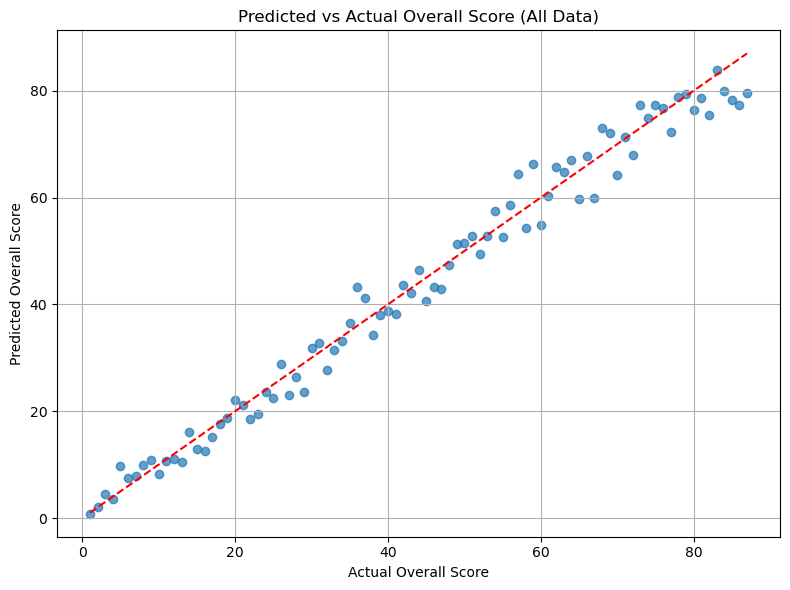

In [38]:
# Predict on all data (optional)
y_all_scaled = y_scaler.transform(y.reshape(-1, 1))
y_pred_all_scaled = regr.predict(X_scale).reshape(-1, 1)
y_pred_all_real = y_scaler.inverse_transform(y_pred_all_scaled)

# Plot against original y (real-world)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_all_real, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Overall Score")
plt.ylabel("Predicted Overall Score")
plt.title("Predicted vs Actual Overall Score (All Data)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# Step 1: Check correlation with GDP
correlations = countries.corr(numeric_only=True)['OVERALL_R'].sort_values(ascending=False)

# Step 2: Print or plot
print(correlations)

OVERALL_R                               1.000000
A good job market_R                     0.945651
CULTURAL INFLUENCE_R                    0.942389
QUALITY OF LIFE_R                       0.940165
Connected to the rest of the world_R    0.935664
                                          ...   
Affordable_R                           -0.260498
Different_R                            -0.356784
Religious_R                            -0.492163
Cheap manufacturing costs_R            -0.629219
Unapproachable_R                       -0.808850
Name: OVERALL_R, Length: 72, dtype: float64


/var/folders/db/32k4lhpd3_vb765fr1qd31500000gn/T/ipykernel_32083/4136490693.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


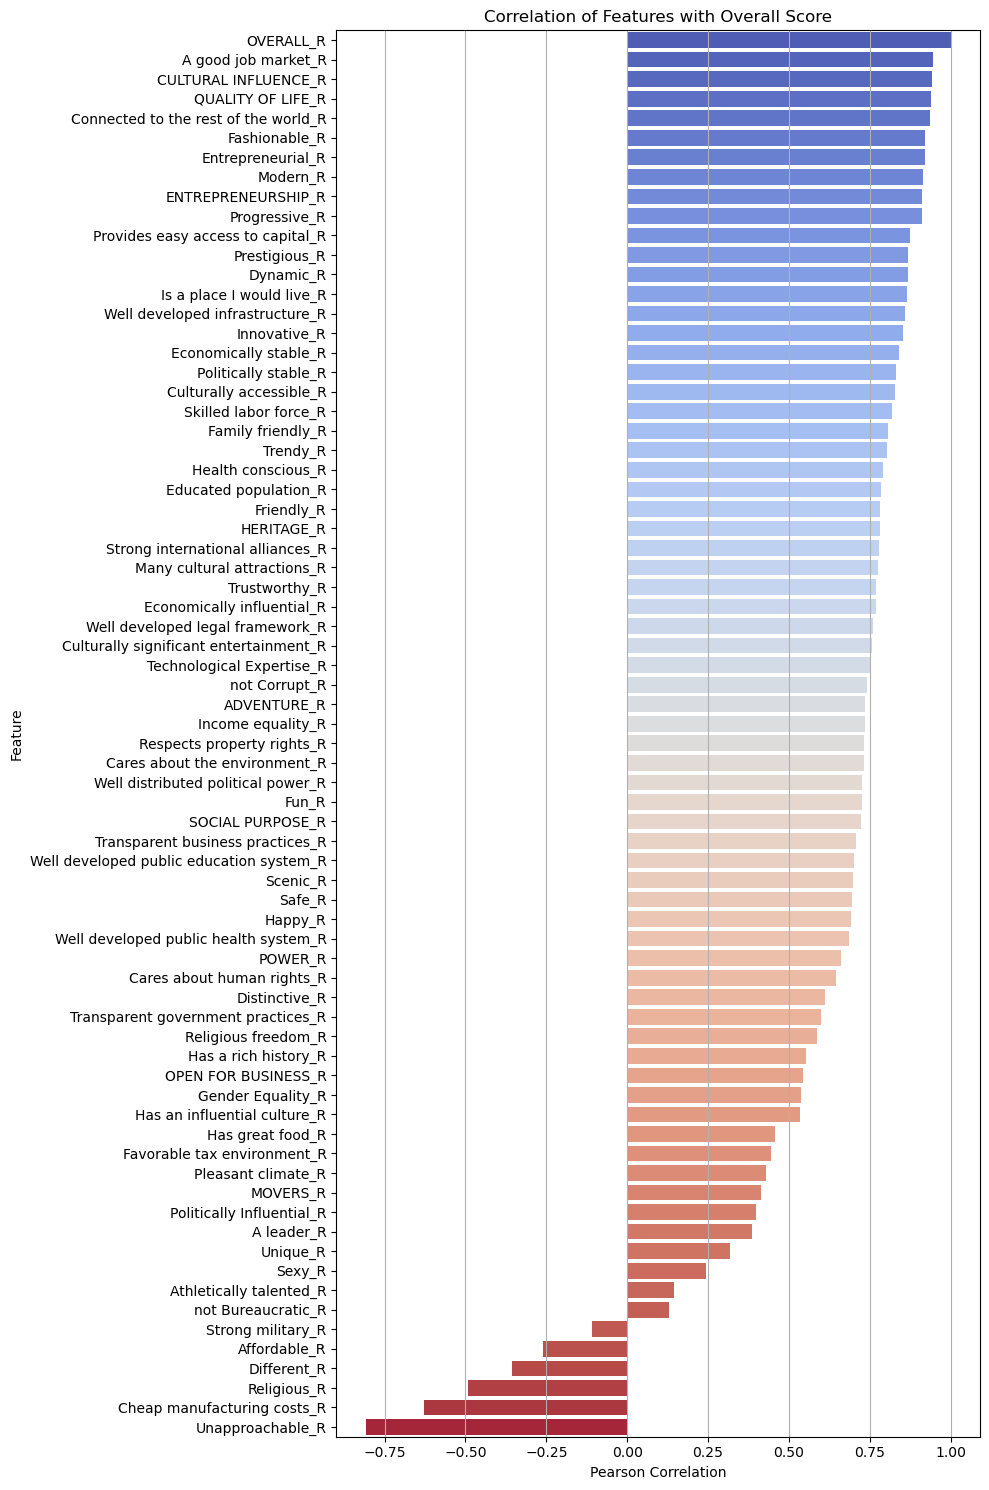

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 15))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title("Correlation of Features with Overall Score")
plt.xlabel("Pearson Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()